# Project Description:

## Project Hypothesis:
In this project we will try to determine if there is any relation between Crime Rate and Fatalities in police shootings.

## Data Description:

#### Data Span:
The datasets contain data several years. But to establish a correlation we will use data of 2015-2017

#### Data to Support Hypothesis:
To make sure that our taken decision on our hypothesis is correct not some supurious correlation, we will establish some relations from our data considering some aspects of the datasets. we will establish correlations based on:-
    1. total number of crimes reported  and total number of fatalites.
    2. percentage of deaths in police shooting per crime numbers

# Importing Necessary Packages and Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Reading Data Files and Cleaning Data For Visualization

### NYPD Crime Data

In [2]:
columns_to_read = ['CMPLNT_FR_DT', 'OFNS_DESC', 'LAW_CAT_CD', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX']
nypd_complaint_data_to_date = pd.read_csv('NYPD_Complaint_Data_Historic.csv', usecols=columns_to_read)

In [3]:
nypd_complaint_data_to_date.head()

,CMPLNT_FR_DT,OFNS_DESC,LAW_CAT_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX
0,2/11/2015,OFFENSES AGAINST PUBLIC ADMINI,MISDEMEANOR,25-44,BLACK,M
1,3/17/2012,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,NaN,NaN,NaN
2,10/27/2016,HARRASSMENT 2,VIOLATION,<18,BLACK,M
3,11/27/2014,RAPE,FELONY,25-44,WHITE HISPANIC,M
4,12/11/2013,GRAND LARCENY,FELONY,NaN,NaN,NaN


In [4]:
# renaming column names
cols_renamed = {'CMPLNT_FR_DT': 'Date_of_Occurence',
                'OFNS_DESC': 'Offense_Description',
                'LAW_CAT_CD': 'Level_of_Offense',
                'SUSP_AGE_GROUP': 'Suspect_Age_Group',
                'SUSP_RACE': 'Suspect_Race',
                'SUSP_SEX': 'Suspect_Sex'}
nypd_complaint_data_to_date.rename(columns=cols_renamed, inplace=True)
nypd_complaint_data_to_date

,Date_of_Occurence,Offense_Description,Level_of_Offense,Suspect_Age_Group,Suspect_Race,Suspect_Sex
0,2/11/2015,OFFENSES AGAINST PUBLIC ADMINI,MISDEMEANOR,25-44,BLACK,M
1,3/17/2012,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,NaN,NaN,NaN
2,10/27/2016,HARRASSMENT 2,VIOLATION,<18,BLACK,M
3,11/27/2014,RAPE,FELONY,25-44,WHITE HISPANIC,M
4,12/11/2013,GRAND LARCENY,FELONY,NaN,NaN,NaN
...,...,...,...,...,...,...
196930,2/7/2008,HARRASSMENT 2,VIOLATION,NaN,WHITE,F
196931,NaN,NaN,NaN,NaN,NaN,NaN
196932,NaN,NaN,NaN,NaN,NaN,NaN
196933,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# changing Date of Occurence to datetime type
nypd_complaint_data_to_date['Date_of_Occurence'] = pd.to_datetime(nypd_complaint_data_to_date['Date_of_Occurence'])

In [6]:
filt = (nypd_complaint_data_to_date['Date_of_Occurence'] < '2018-01-01') & (nypd_complaint_data_to_date['Date_of_Occurence'] > '2014-12-31')
nypd_complaint_data = nypd_complaint_data_to_date[filt]
nypd_complaint_data.head()

,Date_of_Occurence,Offense_Description,Level_of_Offense,Suspect_Age_Group,Suspect_Race,Suspect_Sex
0,2015-02-11,OFFENSES AGAINST PUBLIC ADMINI,MISDEMEANOR,25-44,BLACK,M
2,2016-10-27,HARRASSMENT 2,VIOLATION,<18,BLACK,M
9,2016-09-17,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,UNKNOWN,BLACK,M
12,2015-05-17,PETIT LARCENY,MISDEMEANOR,NaN,NaN,NaN
14,2017-06-28,HARRASSMENT 2,VIOLATION,25-44,WHITE,U


In [7]:
# Sorting by Date of Occurence
nypd_complaint_data.sort_values(by='Date_of_Occurence', inplace=True)

C:\Users\mhr17\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# seting index to Date of Occurence
nypd_complaint_data.set_index('Date_of_Occurence', inplace=True)
nypd_complaint_data.head()

,Offense_Description,Level_of_Offense,Suspect_Age_Group,Suspect_Race,Suspect_Sex
Date_of_Occurence,,,,,
2015-01-01,GRAND LARCENY,FELONY,NaN,UNKNOWN,U
2015-01-01,SEX CRIMES,MISDEMEANOR,NaN,BLACK,M
2015-01-01,CRIMINAL MISCHIEF & RELATED OF,FELONY,NaN,UNKNOWN,U
2015-01-01,PETIT LARCENY,MISDEMEANOR,NaN,UNKNOWN,U
2015-01-01,PETIT LARCENY,MISDEMEANOR,NaN,NaN,NaN


### Fatal Police Shootings Data

In [9]:
columns_to_read = ['date', 'age', 'gender', 'race', 'armed', 'threat_level', 'state']
fatal_police_shootings_data_to_date = pd.read_csv('fatal-police-shootings-data.csv', usecols=columns_to_read)

In [10]:
fatal_police_shootings_data_to_date.head()

,date,armed,age,gender,race,state,threat_level
0,2015-01-02,gun,53.0,M,A,WA,attack
1,2015-01-02,gun,47.0,M,W,OR,attack
2,2015-01-03,unarmed,23.0,M,H,KS,other
3,2015-01-04,toy weapon,32.0,M,W,CA,attack
4,2015-01-04,nail gun,39.0,M,H,CO,attack


In [11]:
# Renaming Columns to match crime dataset
cols_renamed = {'date': 'Date_of_Occurence', 'armed': 'Armed', 'age': 'Suspect_Age', 'gender': 'Suspect_Gender', 
                'race': 'Suspect_Race', 'state':'State', 'threat_level': 'Suspect_Threat_Level'}
fatal_police_shootings_data_to_date.rename(columns=cols_renamed, inplace=True)
fatal_police_shootings_data_to_date.head()

,Date_of_Occurence,Armed,Suspect_Age,Suspect_Gender,Suspect_Race,State,Suspect_Threat_Level
0,2015-01-02,gun,53.0,M,A,WA,attack
1,2015-01-02,gun,47.0,M,W,OR,attack
2,2015-01-03,unarmed,23.0,M,H,KS,other
3,2015-01-04,toy weapon,32.0,M,W,CA,attack
4,2015-01-04,nail gun,39.0,M,H,CO,attack


In [12]:
# setting Date of occurence to datetime
fatal_police_shootings_data_to_date['Date_of_Occurence'] = pd.to_datetime(fatal_police_shootings_data_to_date['Date_of_Occurence'])

In [13]:
# getting data for NY of 2015-2017
filt = ((fatal_police_shootings_data_to_date['Date_of_Occurence'] < '2018-01-01') & 
        (fatal_police_shootings_data_to_date['Date_of_Occurence'] > '2014-12-31') &
        (fatal_police_shootings_data_to_date['State'] == 'NY'))
new_york_fatal_police_shootings_data = fatal_police_shootings_data_to_date[filt]
new_york_fatal_police_shootings_data.head()

,Date_of_Occurence,Armed,Suspect_Age,Suspect_Gender,Suspect_Race,State,Suspect_Threat_Level
95,2015-02-08,gun,57.0,M,W,NY,attack
215,2015-03-21,gun,44.0,M,W,NY,attack
220,2015-03-22,undetermined,21.0,M,B,NY,attack
301,2015-04-22,gun,30.0,M,W,NY,attack
312,2015-04-25,unarmed,24.0,M,B,NY,attack


In [14]:
# reseting index
new_york_fatal_police_shootings_data.reset_index(drop=True, inplace=True)
new_york_fatal_police_shootings_data.head()

,Date_of_Occurence,Armed,Suspect_Age,Suspect_Gender,Suspect_Race,State,Suspect_Threat_Level
0,2015-02-08,gun,57.0,M,W,NY,attack
1,2015-03-21,gun,44.0,M,W,NY,attack
2,2015-03-22,undetermined,21.0,M,B,NY,attack
3,2015-04-22,gun,30.0,M,W,NY,attack
4,2015-04-25,unarmed,24.0,M,B,NY,attack


In [15]:
# Creating a column to store Suspect Age Group and defaulting it's values to empty string
new_york_fatal_police_shootings_data['Suspect_Age_Group'] = ''

# writing to empty Series
for idx, age in enumerate(new_york_fatal_police_shootings_data['Suspect_Age']):
    if age == np.nan:
        new_york_fatal_police_shootings_data.loc[idx, 'Suspect_Age_Group'] = np.nan
    if age < 18:
        new_york_fatal_police_shootings_data.loc[idx, 'Suspect_Age_Group'] = '<18'
    if age >= 18 and age < 25:
        new_york_fatal_police_shootings_data.loc[idx, 'Suspect_Age_Group'] = '18-24'
    if age >= 25 and age < 45:
        new_york_fatal_police_shootings_data.loc[idx, 'Suspect_Age_Group'] = '25-44'
    if age >= 45 and age < 65:
        new_york_fatal_police_shootings_data.loc[idx, 'Suspect_Age_Group'] = '45-64'
    if age >= 65:
        new_york_fatal_police_shootings_data.loc[idx, 'Suspect_Age_Group'] = '65+'

new_york_fatal_police_shootings_data.head()

C:\Users\mhr17\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mhr17\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Date_of_Occurence,Armed,Suspect_Age,Suspect_Gender,Suspect_Race,State,Suspect_Threat_Level,Suspect_Age_Group
0,2015-02-08,gun,57.0,M,W,NY,attack,45-64
1,2015-03-21,gun,44.0,M,W,NY,attack,25-44
2,2015-03-22,undetermined,21.0,M,B,NY,attack,18-24
3,2015-04-22,gun,30.0,M,W,NY,attack,25-44
4,2015-04-25,unarmed,24.0,M,B,NY,attack,18-24


In [16]:
# Setting Index to Date of Occurence
new_york_fatal_police_shootings_data.set_index('Date_of_Occurence', inplace=True)
new_york_fatal_police_shootings_data.head()

,Armed,Suspect_Age,Suspect_Gender,Suspect_Race,State,Suspect_Threat_Level,Suspect_Age_Group
Date_of_Occurence,,,,,,,
2015-02-08,gun,57.0,M,W,NY,attack,45-64
2015-03-21,gun,44.0,M,W,NY,attack,25-44
2015-03-22,undetermined,21.0,M,B,NY,attack,18-24
2015-04-22,gun,30.0,M,W,NY,attack,25-44
2015-04-25,unarmed,24.0,M,B,NY,attack,18-24


# Grouping Data to Establish Relations

#### NYPD Complaint Dataset

In [17]:
nypd_complaint_data_year_group = nypd_complaint_data.groupby(by=nypd_complaint_data.index.year)

In [18]:
# Creating a Project Data Frame To Hold Necessary information
project_index = nypd_complaint_data_year_group.groups.keys()
project_data_frame = pd.DataFrame(index=project_index)

In [19]:
# adding total number of crimes per year to project dataframe
# creating a empty column and setting default value to 0
project_data_frame.loc[:,'Total_Crimes_Reported'] = 0
# writting data to column
for year in project_index:
    project_data_frame.loc[year, 'Total_Crimes_Reported'] = nypd_complaint_data_year_group.get_group(year).shape[0]

#### Police Shooting Dataset

In [20]:
new_york_fatal_police_shootings_data_year_group = new_york_fatal_police_shootings_data.groupby(by=new_york_fatal_police_shootings_data.index.year)

In [21]:
# adding total number of deaths in police shooting to project data frame
# creating a empty column and setting default value to 0
project_data_frame.loc[:,'Deaths_in_Police_Shooting'] = 0
# writting data to column
for year in project_index:
    project_data_frame.loc[year, 'Deaths_in_Police_Shooting'] = new_york_fatal_police_shootings_data_year_group.get_group(year).shape[0]

In [22]:
# creating percentage of deaths per crime reported
project_data_frame.loc[:,'%Deaths_per_Crime_Reported'] = (project_data_frame['Deaths_in_Police_Shooting']
                                                          /project_data_frame['Total_Crimes_Reported'])*100
project_data_frame

,Total_Crimes_Reported,Deaths_in_Police_Shooting,%Deaths_per_Crime_Reported
2015,4289,19,0.442994
2016,4238,17,0.401133
2017,4067,16,0.393410


# Visualization of Data

### Yearly Relation Visualization Using Line Plot and Bar Plot

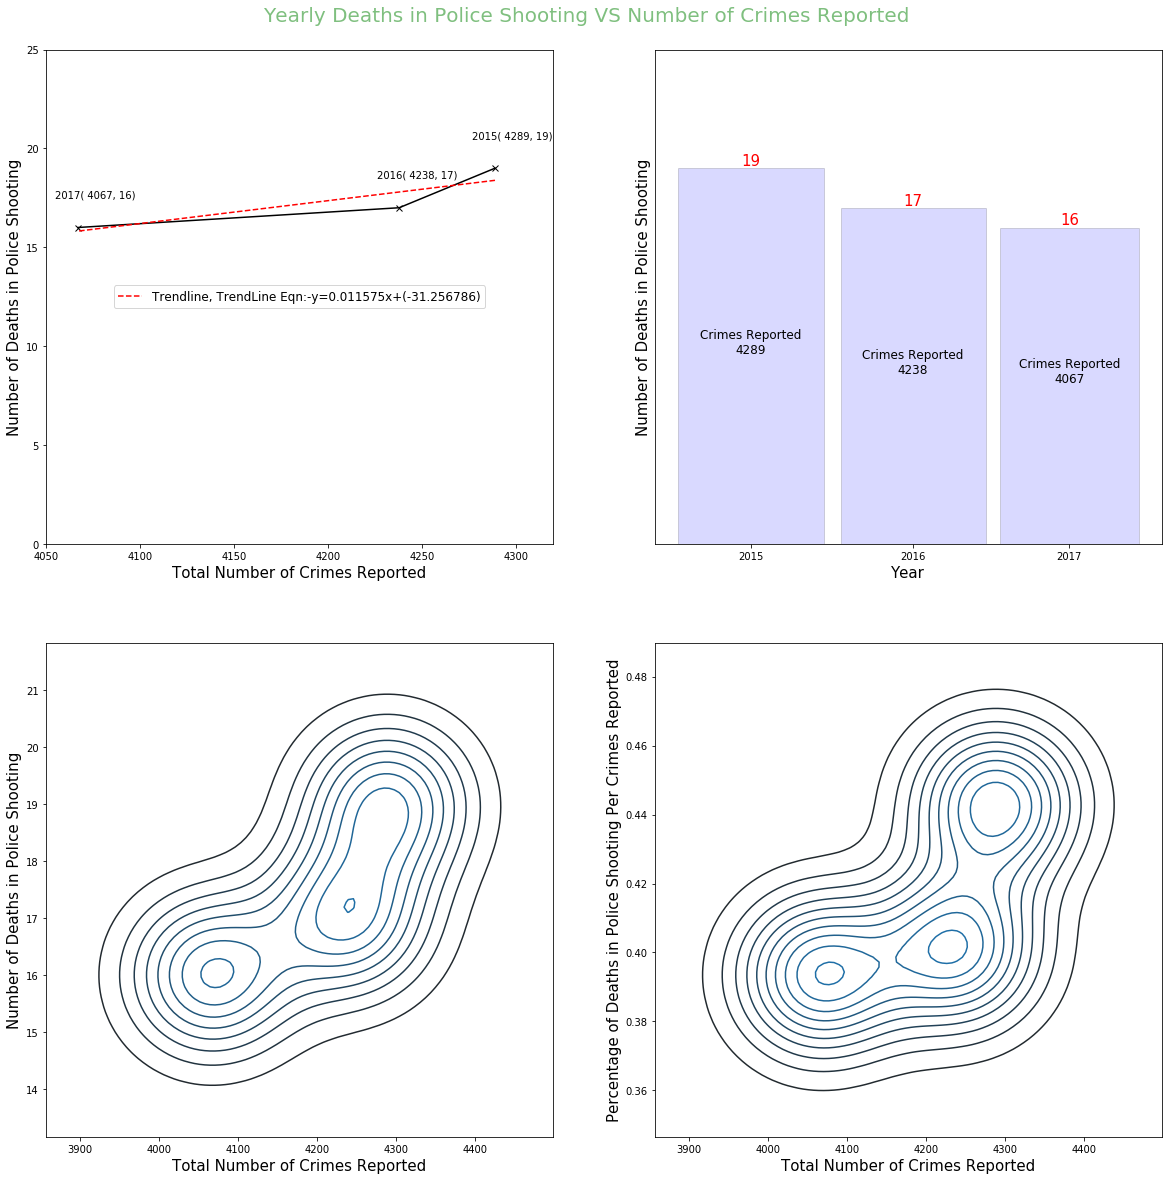

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

# plotting a line plot with a trendline for total number of reported crime and total number of Deaths in police shooting
tcr = project_data_frame['Total_Crimes_Reported']
dps = project_data_frame['Deaths_in_Police_Shooting']
line = ax1.plot(tcr, dps, 'kx-')
for year in project_data_frame.index:
    ax1.annotate('{}( {}, {})'.format(year, tcr[year], dps[year]), (tcr[year]-12,dps[year]+1.5))
# calc the trendline and plotting trendline
z = np.polyfit(tcr, dps, 1)   # the line equation: "y=%.6fx+(%.6f)"%(z[0],z[1]))
p = np.poly1d(z)
trendline = ax1.plot(tcr,p(tcr),"r--", label='Trendline, TrendLine Eqn:-{}'.format("y=%.6fx+(%.6f)"%(z[0],z[1])))
# setting necessary labels and limits
ax1.set_xlabel('Total Number of Crimes Reported', fontsize=15)
ax1.set_ylabel('Number of Deaths in Police Shooting', fontsize=15)
ax1.set_xlim(4050, 4320)
ax1.set_ylim(0, 25)
ax1.legend(loc='center', fontsize=12)

# Plotting a Bar Graph to visualize Data
bar = ax2.bar(tcr.cumsum() + [1000, 1500, 2000], dps, width=tcr, color='b', alpha=0.15, edgecolor='k', 
              tick_label=project_data_frame.index)
# creating labels of Bars
for rect in bar:
    h = rect.get_height()
    w = rect.get_width()
    x_side = rect.get_x()
    y_side = rect.get_y()
    ax2.text(x_side+w/2, y_side+h, s='{}'.format(h), ha='center', va='bottom', c='r', fontsize=15)
    ax2.text(x_side+w/2, y_side+h/2, s='Crimes Reported\n{}'.format(w), ha='center', va='bottom', fontsize=12)
# setting necessary labels
ax2.set_xlabel('Year', fontsize=15)
ax2.set_ylabel('Number of Deaths in Police Shooting', fontsize=15)
ax2.set_ylim(0, 25)
ax2.set_yticks(ticks=[])

# Drawing Kernel Density Function for Data Frame
kde_plot1 = sns.kdeplot(project_data_frame['Total_Crimes_Reported'],project_data_frame['Deaths_in_Police_Shooting'], ax=ax3)
ax3.set_xlabel('Total Number of Crimes Reported', fontsize=15)
ax3.set_ylabel('Number of Deaths in Police Shooting', fontsize=15)

kde_plot2 = sns.kdeplot(project_data_frame['Total_Crimes_Reported'],project_data_frame['%Deaths_per_Crime_Reported'], ax=ax4)
ax4.set_xlabel('Total Number of Crimes Reported', fontsize=15)
ax4.set_ylabel('Percentage of Deaths in Police Shooting Per Crimes Reported', fontsize=15)

# setting Figure Title
fig.suptitle('Yearly Deaths in Police Shooting VS Number of Crimes Reported', x=0.5, y=0.91, 
             fontsize=20, fontweight=500, color='g', alpha=0.5)
fig.savefig('fig.png')
plt.show()

### Correlation Plotting

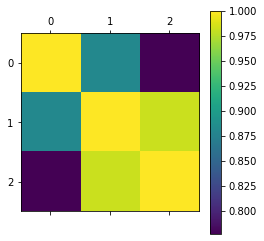

,Total_Crimes_Reported,Deaths_in_Police_Shooting,%Deaths_per_Crime_Reported
Total_Crimes_Reported,1.000000,0.881093,0.777029
Deaths_in_Police_Shooting,0.881093,1.000000,0.982336
%Deaths_per_Crime_Reported,0.777029,0.982336,1.000000


In [24]:
corr = project_data_frame.corr()
plt.matshow(corr, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()
corr

### Kernel Density Estimation Plot

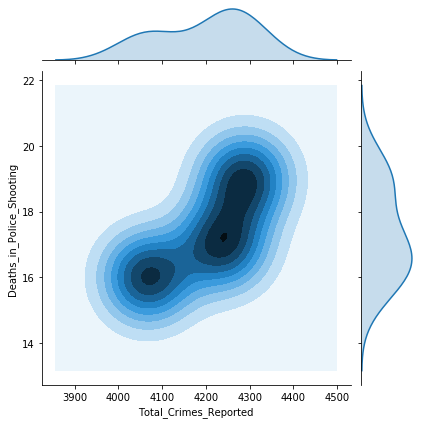

In [25]:
sns.jointplot(project_data_frame['Total_Crimes_Reported'], project_data_frame['Deaths_in_Police_Shooting'], kind='kde')

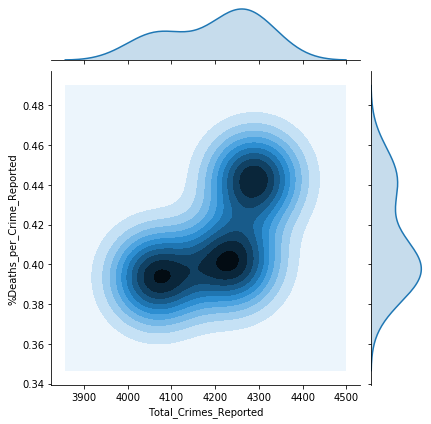

In [26]:
sns.jointplot(project_data_frame['Total_Crimes_Reported'], project_data_frame['%Deaths_per_Crime_Reported'], kind='kde')

# Decision on the Basis of Data Analysis

From the Visualizations We can say that there is a strong relation ship between 'Total Number of Crimes Reported' and 'Deaths in Police Shooting'.

We can also see from correlation table and correlation graph that there is a strong correlation between two as correlation factor is > 0.8.

We drew a Trendline in our Line Plot Whose slight Upward Slope indicates a positive(mathematically) relationship between two variables.